In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [3]:
def get_full_df(file_names, years, data_path, column_names):
    dfs = []
    i = 0
    for file in file_names:
        df = pd.read_csv(data_path + file, index_col= None, usecols= column_names, low_memory= False)
        df['year'] = years[i]
        i += 1
        dfs.append(df)

    tot_df = pd.concat(dfs, axis=0, ignore_index=True)
    return tot_df

def select_colleges(df, college_list):
    dfs = []
    for college in college_list:
        dfs.append(df.loc[df['INSTNM'] == college])
    tot_df = pd.concat(dfs, axis=0, ignore_index=True)
    return tot_df

data_path = '/mnt/d/Downloads/CollegeScorecard_Raw_Data_01192021/Raw Data Files/'

merged_file_names = ['MERGED1996_97_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2000_01_PP.csv', 
                     'MERGED2001_02_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2005_06_PP.csv', 
                     'MERGED2006_07_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 
                     'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 
                     'MERGED2016_17_PP.csv', 'MERGED2017_18_PP.csv', 'Most-Recent-Cohorts-All-Data-Elements.csv']
merged_years = list(range(1996, 2019))
merged_cols = pd.read_csv(data_path + 'MERGED1996_97_PP.csv', index_col=0, nrows=0).columns.tolist()

field_file_names = ['FieldOfStudyData1415_1516_PP.csv', 'FieldOfStudyData1516_1617_PP.csv', 'Most-Recent-Cohorts-Field-of-Study.csv']
field_years = list(range(2016, 2019))
field_cols = pd.read_csv(data_path + 'FieldOfStudyData1415_1516_PP.csv', index_col=0, nrows=0).columns.tolist()

base_cols = ['UNITID', 'OPEID6', 'INSTNM']

colleges = ["University of Colorado Boulder", "University of San Diego", "University of California-Los Angeles", "New York University", "The University of Texas at Austin"]

In [6]:
work_cols = ['COUNT_NWNE_P10', 'COUNT_WNE_P10', 'MN_EARN_WNE_P10', 'PCT90_EARN_WNE_P10', 'MN_EARN_WNE_INC3_P10', 'MN_EARN_WNE_P6']
work_df = get_full_df(merged_file_names, merged_years, data_path, base_cols + work_cols)

In [8]:
work_college_df = select_colleges(work_df, colleges)

In [19]:
work_college_df = work_college_df.dropna()
work_college_df[work_cols] = work_college_df[work_cols].apply(pd.to_numeric, errors='coerce', axis=1)
work_college_df.head()

,UNITID,OPEID6,INSTNM,COUNT_NWNE_P10,COUNT_WNE_P10,MN_EARN_WNE_P10,PCT90_EARN_WNE_P10,MN_EARN_WNE_INC3_P10,MN_EARN_WNE_P6,year
11,126614,1370,University of Colorado Boulder,382,3818,58700,104700,61000,43400,2007
13,126614,1370,University of Colorado Boulder,522,3732,56100,99900,58100,39700,2009
15,126614,1370,University of Colorado Boulder,625,4461,55600,99400,58200,38600,2011
22,126614,1370,University of Colorado Boulder,583,4979,59700,99400,62400,42700,2018
34,122436,10395,University of San Diego,115,1227,68700,124800,72200,51700,2007


In [44]:
work_college_df['perc_work'] = work_college_df['COUNT_WNE_P10'] / (work_college_df['COUNT_NWNE_P10'] + work_college_df['COUNT_WNE_P10'])
work_college_df['inc_6_10_growth'] = work_college_df['MN_EARN_WNE_P10'] - work_college_df['MN_EARN_WNE_P6']

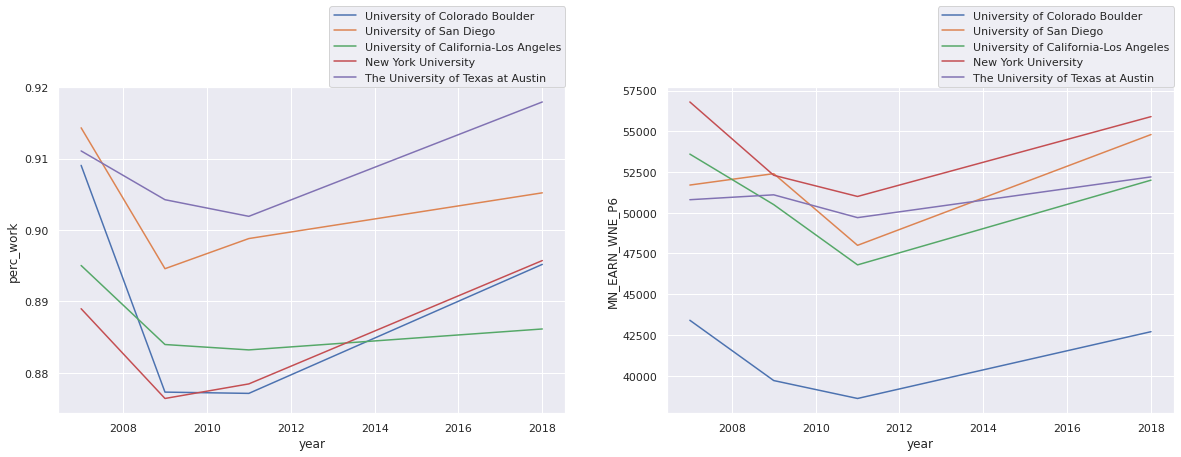

In [50]:
fig, ax =plt.subplots(figsize=(20, 6), ncols=2)

sns.lineplot(x='year', y='perc_work', hue='INSTNM', 
             data=work_college_df, ax = ax[0])
sns.lineplot(x='year', y='MN_EARN_WNE_P6', hue='INSTNM', 
             data=work_college_df, ax = ax[1])
ax[0].legend(bbox_to_anchor=(1.0, 1), loc=4, borderaxespad=0.)
ax[1].legend(bbox_to_anchor=(1.0, 1), loc=4, borderaxespad=0.)

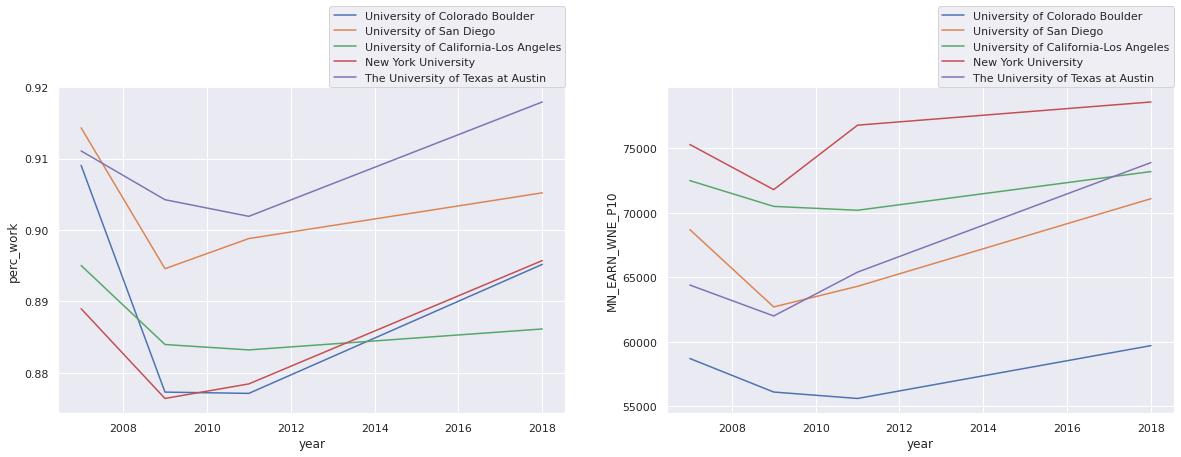

In [49]:
fig, ax =plt.subplots(figsize=(20, 6), ncols=2)

sns.lineplot(x='year', y='perc_work', hue='INSTNM', 
             data=work_college_df, ax = ax[0])
sns.lineplot(x='year', y='MN_EARN_WNE_P10', hue='INSTNM', 
             data=work_college_df, ax = ax[1])
ax[0].legend(bbox_to_anchor=(1.0, 1), loc=4, borderaxespad=0.)
ax[1].legend(bbox_to_anchor=(1.0, 1), loc=4, borderaxespad=0.)

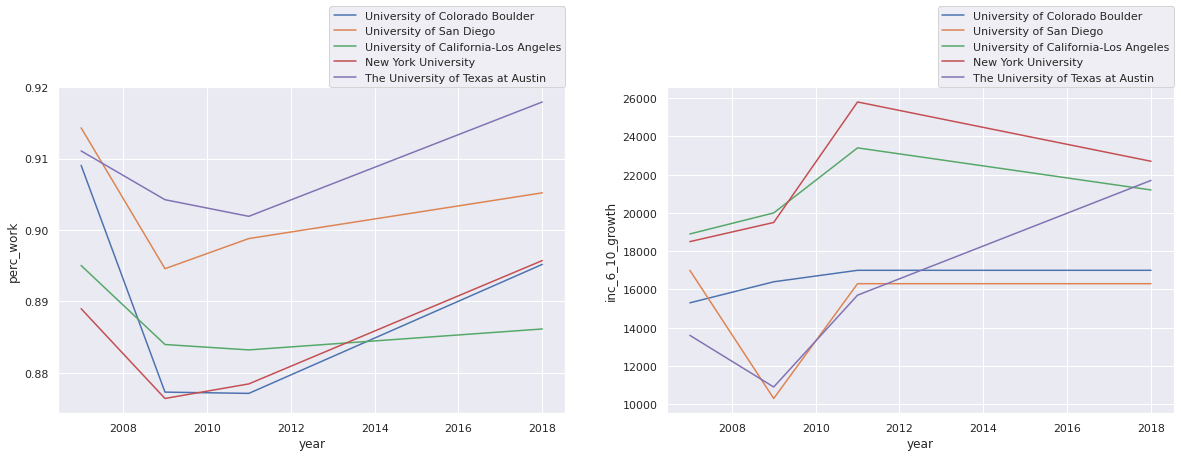

In [48]:
fig, ax =plt.subplots(figsize=(20, 6), ncols=2)

sns.lineplot(x='year', y='perc_work', hue='INSTNM', 
             data=work_college_df, ax = ax[0])
sns.lineplot(x='year', y='inc_6_10_growth', hue='INSTNM', 
             data=work_college_df, ax = ax[1])
ax[0].legend(bbox_to_anchor=(1.0, 1), loc=4, borderaxespad=0.)
ax[1].legend(bbox_to_anchor=(1.0, 1), loc=4, borderaxespad=0.)